In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv("../datasets/train.csv")

In [2]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [3]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    A1 = ReLU(W1.dot(X) + b1)
    A2 = softmax(W2.dot(A1) + b2)
    return A1, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(A1, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dA2 = A2 - one_hot_Y
    dW2 = 1 / m * dA2.dot(A1.T)
    db2 = 1 / m * np.sum(dA2)
    dA1 = W2.T.dot(dA2) * ReLU_deriv(A1)
    dW1 = 1 / m * dA1.dot(X.T)
    db1 = 1 / m * np.sum(dA1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [4]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        A1, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop( A1, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [5]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 5 ... 1 1 6] [2 7 7 ... 5 3 3]
0.10882926829268293
Iteration:  50
[2 9 7 ... 7 8 6] [2 7 7 ... 5 3 3]
0.4909268292682927
Iteration:  100
[2 9 7 ... 8 8 6] [2 7 7 ... 5 3 3]
0.6603902439024391
Iteration:  150
[2 9 7 ... 5 8 8] [2 7 7 ... 5 3 3]
0.7460487804878049
Iteration:  200
[2 9 7 ... 5 8 8] [2 7 7 ... 5 3 3]
0.7866585365853659
Iteration:  250
[2 9 7 ... 5 8 8] [2 7 7 ... 5 3 3]
0.8105609756097562


KeyboardInterrupt: 

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


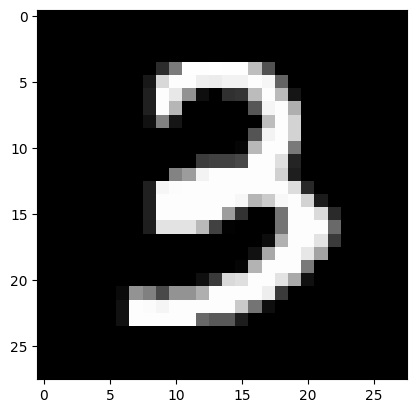

In [ ]:
test_prediction(np.random.randint(0,255), W1,b1,W2,b2)